# Modules

In [1]:
#Basics
import sys
import os
import numpy as np
import pandas as pd

# Visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import cm


# Specific to biomolecular simulations
import MDAnalysis as mda

# My functions
import functions as ki


/home/forget/software/anaconda3/envs/mdaenv2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/forget/software/anaconda3/envs/mdaenv2/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


# Charge datas

Here we charge the df which contains all the values of the data, which has already been computed for each frame of the trajectory, and which have been sotred as an array, inside a CSV file format. 

The array must contain several columns, which are required for the production of the plot (see bellow).



In [7]:
# Load the data
myPath = "../Examples/"
myName = "A_HairpinRibozyme_REST2_traj"

df = pd.read_csv( myPath + myName + '.csv' )


# Plot

In [8]:
# These are the data from the df, and which will be used for the analysis.
Data_names = ['d_A-1:O2prime-G8:N1', 
              'd_A-1:O2prime-A10:N6', 
              'd_A-1:O2prime-A38:N6', 
              'd_A-1:O2prime-G+1:O1P', 
              'd_A-1:O2prime-G+1:O2P', 
              'd_G+1:O1P-G8:N2', 
              'd_G+1:O2P-G8:N2', 
              'A-1_puckering_pseudorot', 
              'IAA']

Long_names = ["A-1:O2' - G8:N1", 
             "A-1:O2' - A10:N6", 
             "A-1:O2' - A38:N6", 
             "A-1:O2'- G+1:pro-Sp", 
             "A-1:O2' - G+1:pro-Rp", 
             "G+1:pro-Sp - G8:N2", 
             "G+1:pro-Rp - G8:N2", 
             "A-1 pseudo-rotation (°)*", 
             'IAA (°)']

Last time of simu =  672600.0
nb of points= 13453
size of step =  0.0 50.0 49.99628335687207


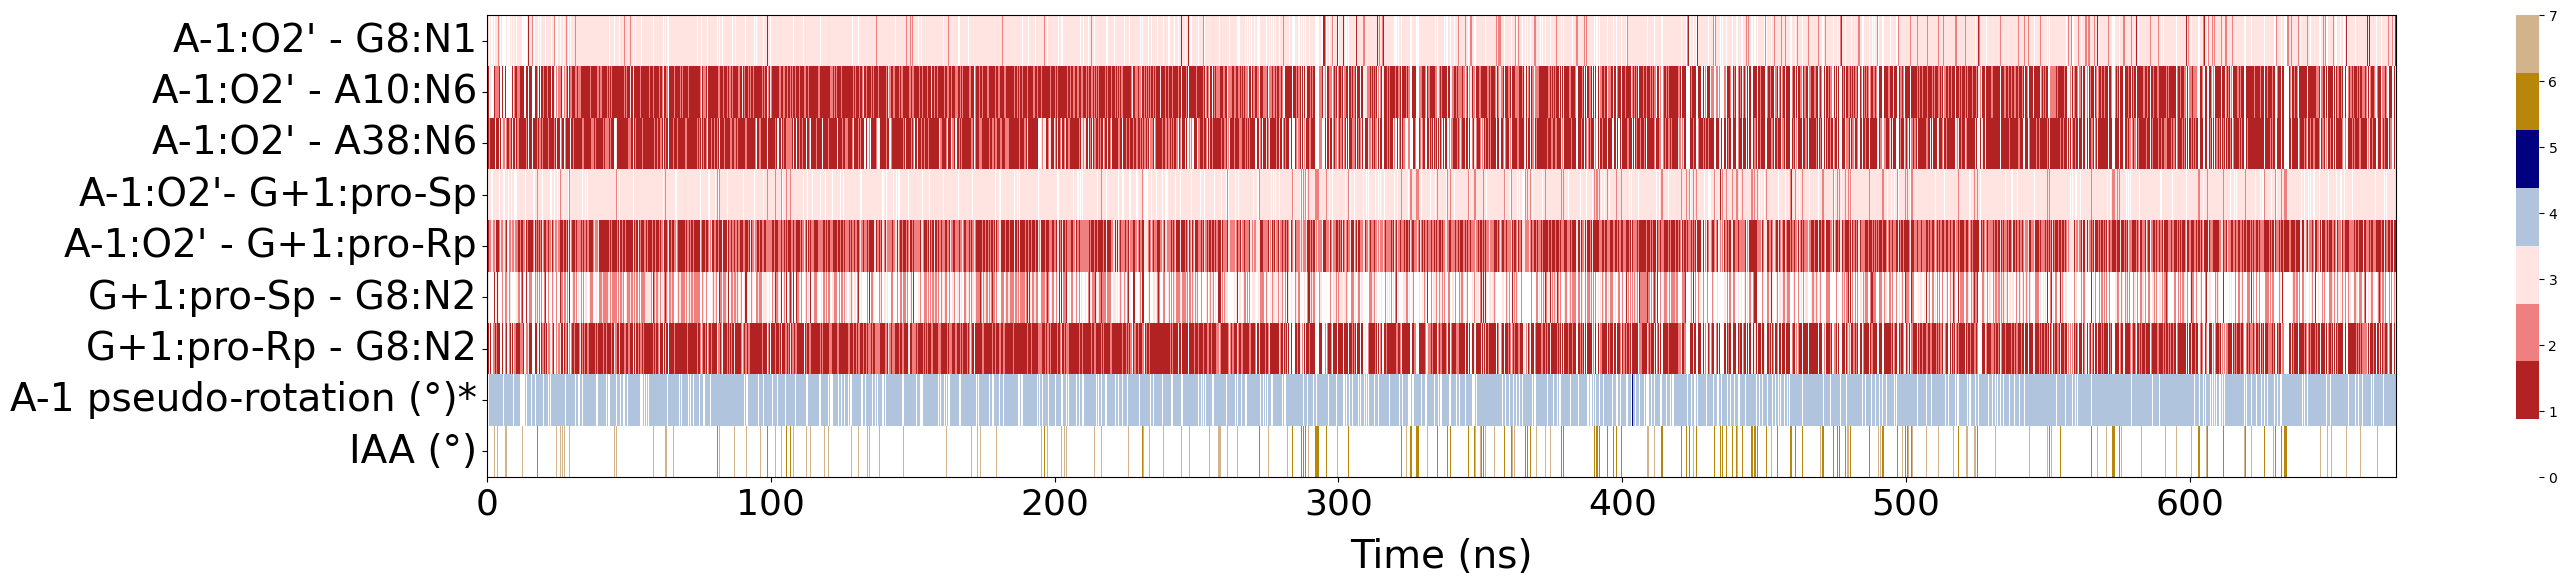

In [12]:
custom_colors = ['white','firebrick', 'lightcoral', 'mistyrose','lightsteelblue','navy','darkgoldenrod','tan']
custom_cmap = ListedColormap(custom_colors)


# Load time component.   
time= df['Time']
print("Last time of simu = ",time[len(time)-1])
print("nb of points=",len(time))
print("size of step = ", time[0],time[1], str(float(time[len(time)-1])/len(time)))
step = int(time[1])

new_xticks = [0,100,200,300,400,500,600]
xticks_positions = [i*1000/step for i in new_xticks]


# Organize the data in a 2D array
Emptyarray=np.zeros((len(time),len(Data_names))) 

for d in [0,1,2,3,4,5,6]:
    data = df[Data_names[d]]
    for k in range(len(data)):
        if data[k]<=3.1 :
            Emptyarray[k,d]=1
        elif 3.1<data[k]<=4.1 :
            Emptyarray[k,d]=2
        elif 4.1<data[k]<=5.1 :
            Emptyarray[k,d]=3

d=7
pu = df[Data_names[d]]
for k in range(len(pu)):
    if 0<= pu[k] <= 36:
        Emptyarray[k,d]=4
    elif  144 <= pu[k] <= 180:
        Emptyarray[k,d]=5


d=8
IAA = df[Data_names[d]]
for k in range(len(IAA)):
    if 140 <= IAA[k] :
        #print("k=",k,"d=",d)
        Emptyarray[k,d]=6
    elif 125 <= IAA[k] < 140:
        Emptyarray[k,d]=7


Bool_df=pd.DataFrame(Emptyarray,columns = Long_names)
Bool_df_tr = Bool_df.transpose()


# Plot the data
f, ax = plt.subplots(figsize=(30.8,6))
mask = np.triu(np.ones_like(Bool_df_tr, dtype=bool))
cmap=sns.color_palette("cubehelix_r", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(Bool_df_tr, cmap=custom_cmap,vmin=0, vmax=7)

# Ajouter un cadre en ajustant les limites des axes
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)


# Set the new xticks labels and their positions
ax.set_xticks(xticks_positions)
ax.set_xticklabels(new_xticks, fontsize=26, rotation = 0)  # You can customize the rotation
ax.tick_params(axis='y', labelsize= 28)

# Customize the x-axis label text
x_axis_label_text = "Time (ns)"  # Replace with your desired label text

# Set the x-axis label
ax.set_xlabel(x_axis_label_text, fontsize=28)

# Customize the rotation of the x-axis label if needed
ax.xaxis.set_label_coords(0.5, -0.13)  # Adjust the coordinates for positioning

# Save the figure
plt.savefig( myPath + myName + "_reduced-fingerprints.pdf", bbox_inches='tight')

# Show the plot
plt.show()
